## Normalize vs World Pose Data

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import imageio

In [175]:
df1 = pd.read_csv('data/external/test/dictionary.csv')
df2 = pd.read_csv('data/external/test/dictionary2.csv')

In [176]:
def transform_pose_data(input_df):
    df = input_df.copy()
    df['head_x'] = df[[f'landmark_{i:02d}_x' for i in range(11)]].mean(axis=1)
    df['head_y'] = df[[f'landmark_{i:02d}_y' for i in range(11)]].mean(axis=1)
    df['head_z'] = df[[f'landmark_{i:02d}_z' for i in range(11)]].mean(axis=1)
    
    df['chest_x'] = df[['landmark_11_x','landmark_12_x']].mean(axis=1)
    df['chest_y'] = df[['landmark_11_y','landmark_12_y']].mean(axis=1)
    df['chest_z'] = df[['landmark_11_z','landmark_12_z']].mean(axis=1)
    
    df['hip_x'] = df[['landmark_23_x','landmark_24_x']].mean(axis=1)
    df['hip_y'] = df[['landmark_23_y','landmark_24_y']].mean(axis=1)
    df['hip_z'] = df[['landmark_23_z','landmark_24_z']].mean(axis=1)
    return df

In [177]:
pose_df = transform_pose_data(df1)
pose_world_df = transform_pose_data(df2)

In [178]:
pose_world_df

,filename,plot_filename,annotated_filename,posename,category,landmark_00_x,landmark_00_y,landmark_00_z,landmark_00_v,landmark_01_x,...,landmark_32_v,head_x,head_y,head_z,chest_x,chest_y,chest_z,hip_x,hip_y,hip_z
0,data/external/test/bridge.png,data/external/test/plot/bridge.png,data/external/test/annotated_bridge.png,bridge,test,0.610995,0.005346,-0.362532,0.999721,0.595000,...,0.549322,0.579802,0.041392,-0.363647,0.450576,-0.010182,-0.236118,0.001081,0.001070,0.000166
1,data/external/test/cradle-split.png,data/external/test/plot/cradle-split.png,data/external/test/annotated_cradle-split.png,cradle split,test,0.430969,-0.180231,-0.490698,0.999999,0.462919,...,0.996864,0.446651,-0.177657,-0.467965,0.416063,-0.100795,-0.199700,0.002001,0.000007,0.000978
2,data/external/test/infinity-seat.png,data/external/test/plot/infinity-seat.png,data/external/test/annotated_infinity-seat.png,infinity seat,test,0.528484,-0.282538,-0.144955,0.999953,0.543392,...,0.989081,0.518233,-0.297682,-0.140074,0.346785,-0.246887,-0.024875,0.003055,-0.000985,0.000868


In [221]:
def plot_world_pose_coordinates(coordinates, azim, title):
    filenames = []
    fig = plt.figure(figsize=(12, 12))
    
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    
    xs = [point[0] for point in coordinates]
    ys = [point[1] for point in coordinates]
    zs = [point[2] for point in coordinates]

    head_torso_connections = [(0, 1),(13, 14),(0, 13),(0, 14)]
    torso_connections = [(2, 3),(3, 4),(4, 2)]
    
    right_hand_connections = [(6, 15), (6, 16), (15, 16)]
    right_shoulder_connections = [(2, 5), (5, 6)]
    right_leg_connections = [(4, 9), (9, 10)]
    right_foot_connections = [(10, 20), (10, 21),(20,21)]
    
    left_hand_connections = [(8, 17), (8, 18), (17, 18)]
    left_shoulder_connections = [(3, 7), (7, 8)]
    left_leg_connections = [(4, 11), (11, 12)]  
    left_foot_connections = [(12, 22), (12, 23),(22,23)]
    
    ax.scatter(xs, zs, ys, color='black')

    def draw_connections(connections, color):
        for connection in connections:
            x_conn = [xs[connection[0]], xs[connection[1]]]
            y_conn = [ys[connection[0]], ys[connection[1]]]
            z_conn = [zs[connection[0]], zs[connection[1]]]
            ax.plot(x_conn, z_conn, y_conn, color=color, linewidth=2)

    draw_connections(head_torso_connections, 'darkseagreen')
    draw_connections(torso_connections, 'darkolivegreen')
    
    draw_connections(right_hand_connections, 'plum')
    draw_connections(right_shoulder_connections, 'plum')
    draw_connections(right_leg_connections, 'palevioletred')
    draw_connections(right_foot_connections, 'palevioletred')
    
    draw_connections(left_hand_connections, 'skyblue')
    draw_connections(left_shoulder_connections, 'skyblue')
    draw_connections(left_leg_connections, 'steelblue')
    draw_connections(left_foot_connections, 'steelblue')

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_zlabel("")

    ax.set_xlim(np.min(xs)-0.01,np.max(xs)+0.01)
    ax.set_ylim(np.min(zs)-0.01,np.max(zs)+0.01)
    ax.set_zlim(np.min(ys)-0.01,np.max(ys)+0.01)

    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.invert_zaxis()

    ax.set_xticks(np.arange(np.min(xs)-0.1, np.max(xs)+0.1, 0.1))
    ax.set_yticks(np.arange(np.min(zs)-0.1, np.max(zs)+0.1, 0.1))
    ax.set_zticks(np.arange(np.min(ys)-0.1, np.max(ys)+0.1, 0.1))

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    ax.set_facecolor('white')

    # Set the grid lines to be lighter
    ax.xaxis._axinfo["grid"]['color'] = (0.3, 0.3, 0.3, 0.1)
    ax.yaxis._axinfo["grid"]['color'] = (0.3, 0.3, 0.3, 0.1)
    ax.zaxis._axinfo["grid"]['color'] = (0.3, 0.3, 0.3, 0.1)

    ax.view_init(elev=10, azim=azim)

    filename = f"plot_azim_{azim}.png"
    plt.savefig(filename)
    filenames.append(filename)
    plt.close(fig)

    plt.show()

def get_3d_coordinates_for_plot(df,i):
    coordinates = [
        (df.iloc[i]['landmark_00_x'], df.iloc[i]['landmark_00_y'], df.iloc[i]['landmark_00_z']), #0
        (df.iloc[i]['chest_x'], df.iloc[i]['chest_y'], df.iloc[i]['chest_z']), #1
        (df.iloc[i]['landmark_12_x'], df.iloc[i]['landmark_12_y'], df.iloc[i]['landmark_12_z']), #2
        (df.iloc[i]['landmark_11_x'], df.iloc[i]['landmark_11_y'], df.iloc[i]['landmark_11_z']), #3
        (df.iloc[i]['hip_x'], df.iloc[i]['hip_y'], df.iloc[i]['hip_z']), #4
        (df.iloc[i]['landmark_14_x'], df.iloc[i]['landmark_14_y'], df.iloc[i]['landmark_14_z']), #5
        (df.iloc[i]['landmark_16_x'], df.iloc[i]['landmark_16_y'], df.iloc[i]['landmark_16_z']), #6
        (df.iloc[i]['landmark_13_x'], df.iloc[i]['landmark_13_y'], df.iloc[i]['landmark_13_z']), #7
        (df.iloc[i]['landmark_15_x'], df.iloc[i]['landmark_15_y'], df.iloc[i]['landmark_15_z']), #8
        (df.iloc[i]['landmark_26_x'], df.iloc[i]['landmark_26_y'], df.iloc[i]['landmark_26_z']), #9
        (df.iloc[i]['landmark_28_x'], df.iloc[i]['landmark_28_y'], df.iloc[i]['landmark_28_z']), #10
        (df.iloc[i]['landmark_25_x'], df.iloc[i]['landmark_25_y'], df.iloc[i]['landmark_25_z']), #11
        (df.iloc[i]['landmark_27_x'], df.iloc[i]['landmark_27_y'], df.iloc[i]['landmark_27_z']), #12
        (df.iloc[i]['landmark_08_x'], df.iloc[i]['landmark_08_y'], df.iloc[i]['landmark_08_z']), #13
        (df.iloc[i]['landmark_07_x'], df.iloc[i]['landmark_07_y'], df.iloc[i]['landmark_00_z']), #14
        (df.iloc[i]['landmark_18_x'], df.iloc[i]['landmark_18_y'], df.iloc[i]['landmark_18_z']), #15
        (df.iloc[i]['landmark_22_x'], df.iloc[i]['landmark_22_y'], df.iloc[i]['landmark_22_z']), #16
        (df.iloc[i]['landmark_17_x'], df.iloc[i]['landmark_17_y'], df.iloc[i]['landmark_17_z']), #17
        (df.iloc[i]['landmark_21_x'], df.iloc[i]['landmark_21_y'], df.iloc[i]['landmark_21_z']), #18
        (df.iloc[i]['landmark_21_x'], df.iloc[i]['landmark_21_y'], df.iloc[i]['landmark_21_z']), #19
        (df.iloc[i]['landmark_30_x'], df.iloc[i]['landmark_30_y'], df.iloc[i]['landmark_30_z']), #20
        (df.iloc[i]['landmark_32_x'], df.iloc[i]['landmark_32_y'], df.iloc[i]['landmark_32_z']), #21
        (df.iloc[i]['landmark_29_x'], df.iloc[i]['landmark_29_y'], df.iloc[i]['landmark_29_z']), #22
        (df.iloc[i]['landmark_31_x'], df.iloc[i]['landmark_31_y'], df.iloc[i]['landmark_31_z']), #23
    ]
    return coordinates

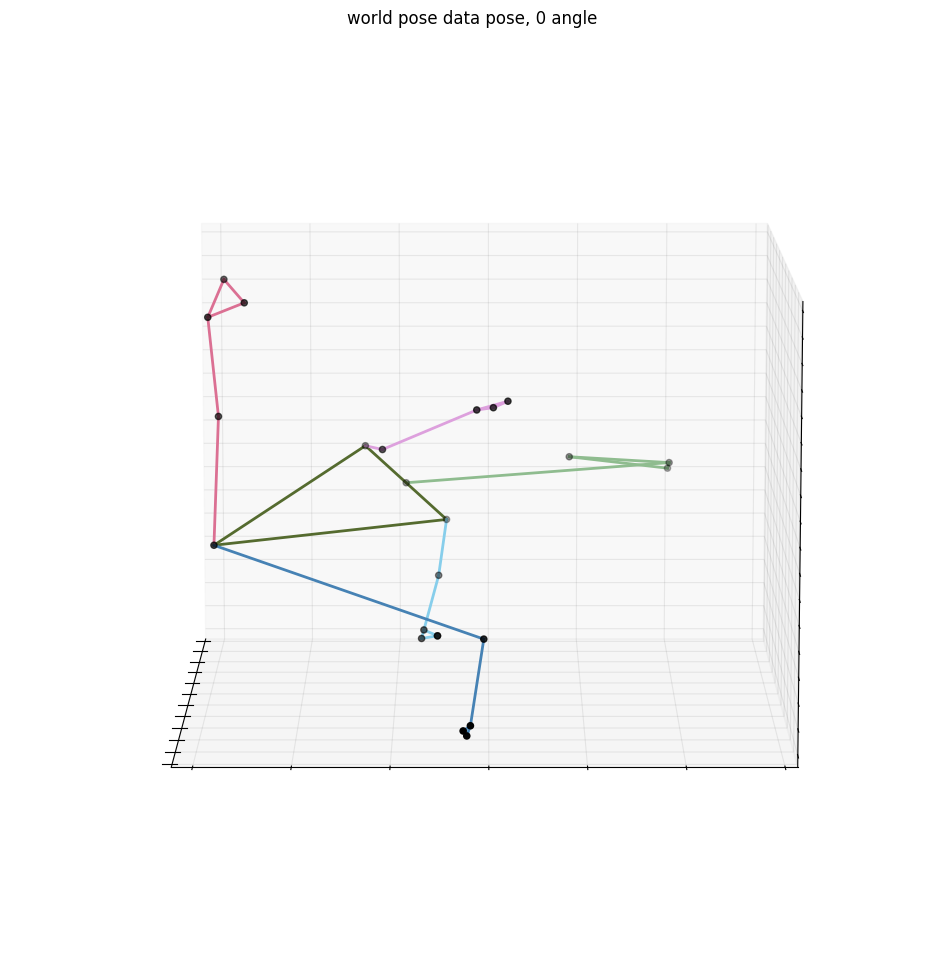

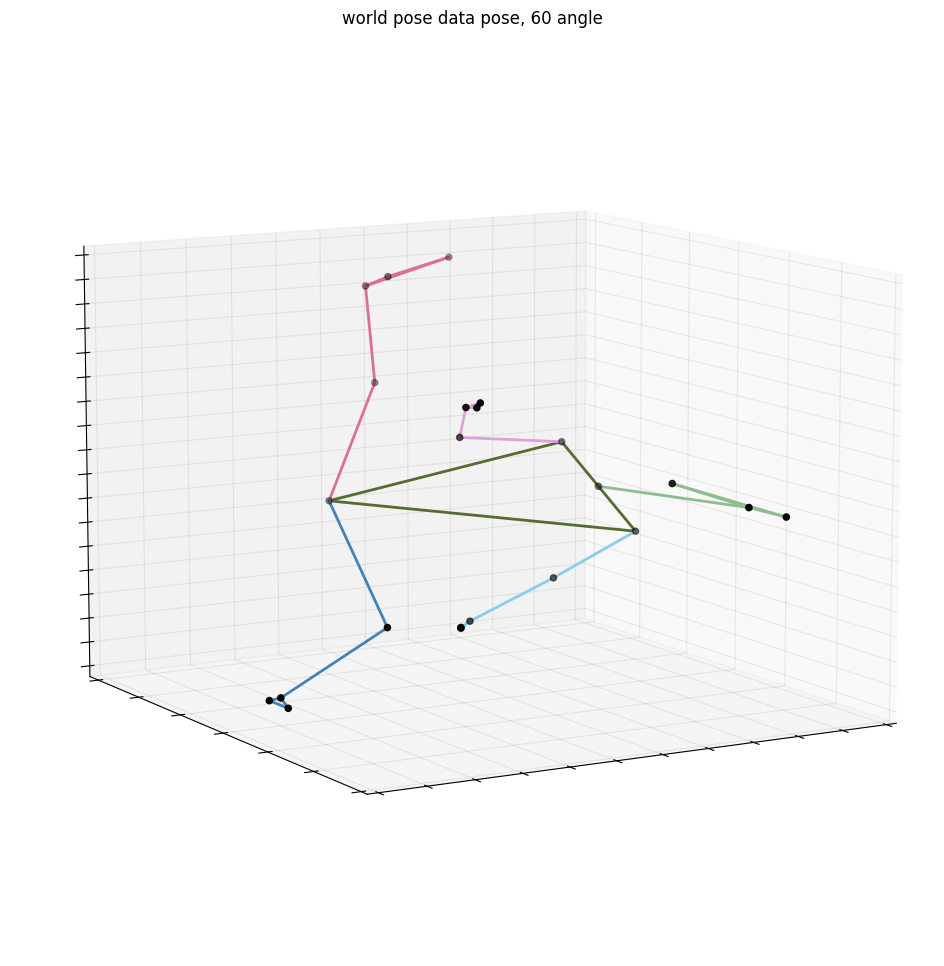

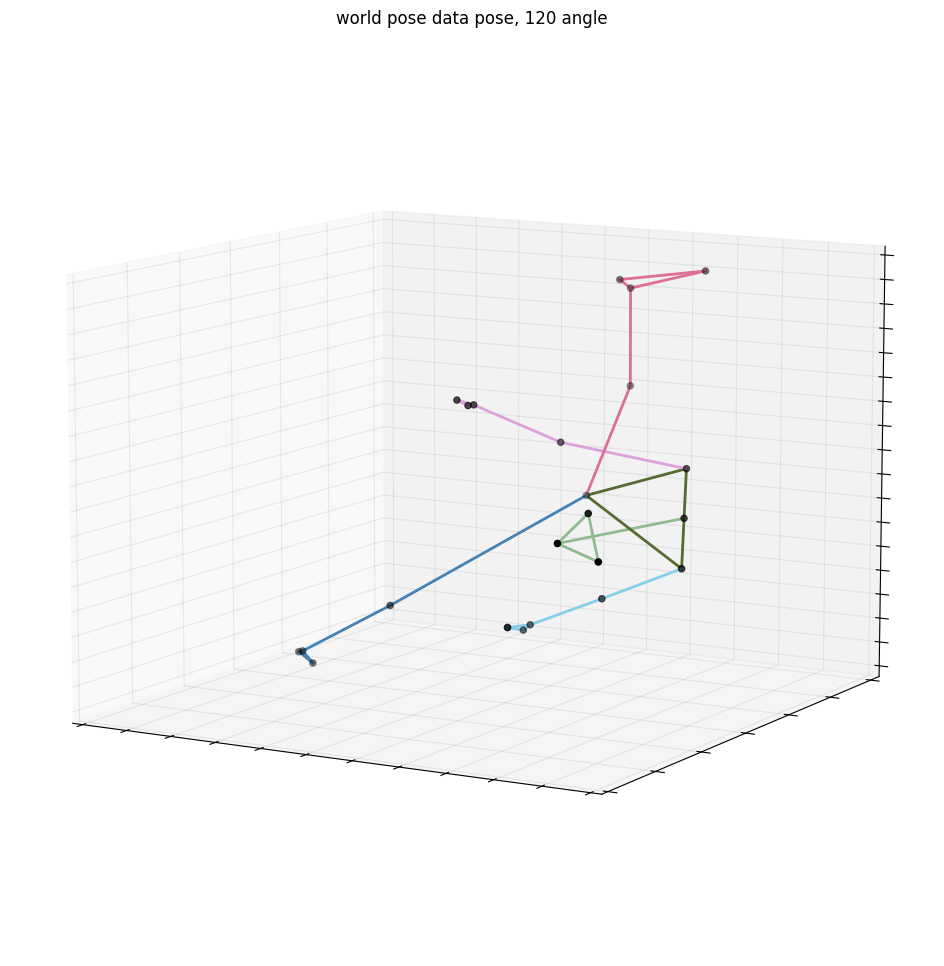

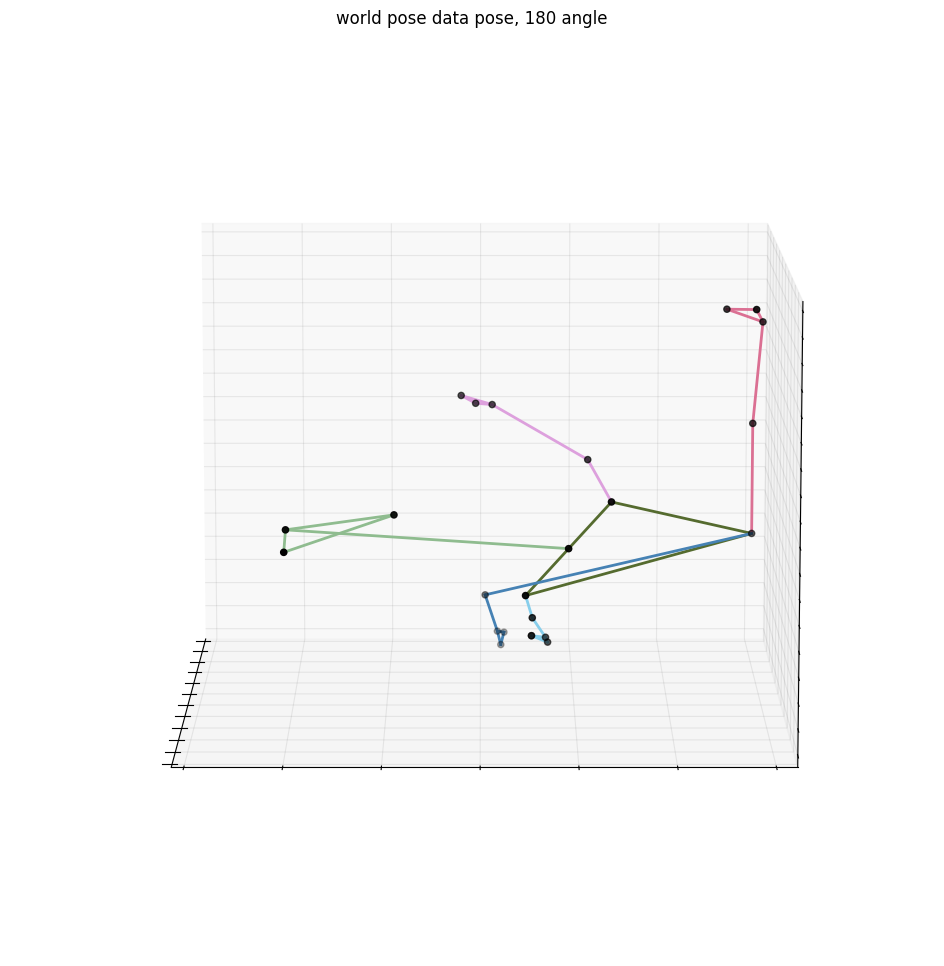

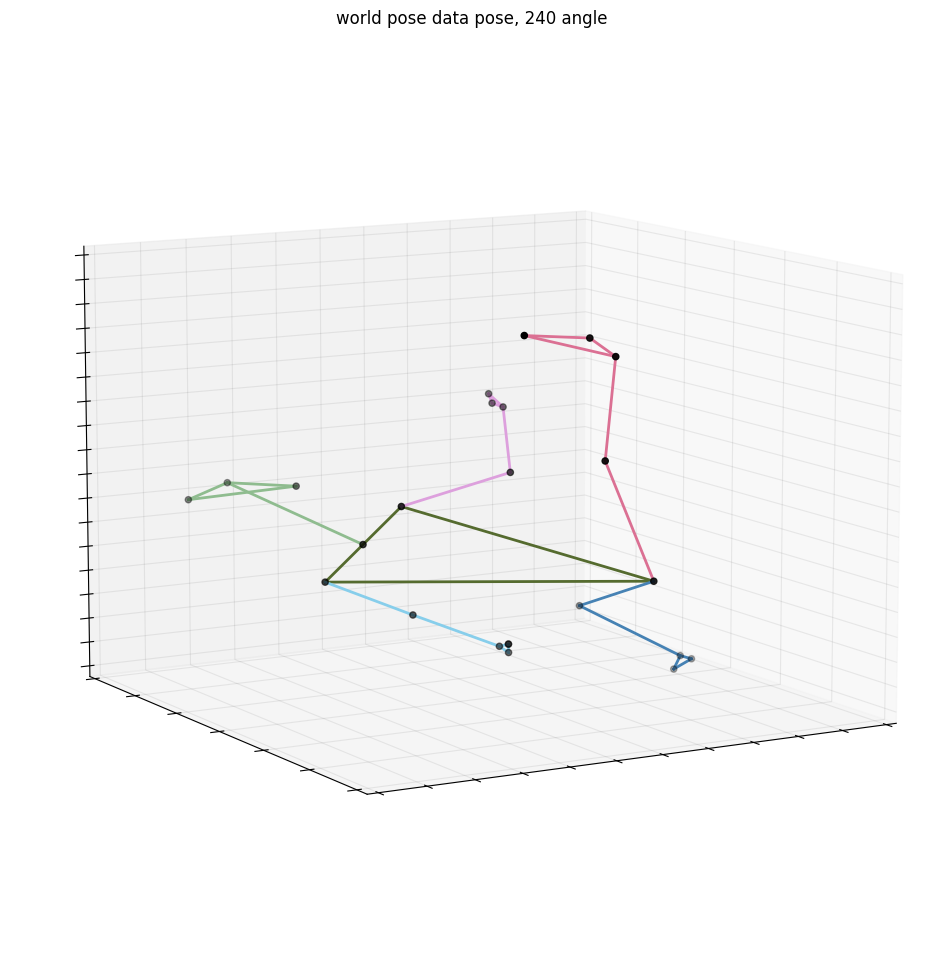

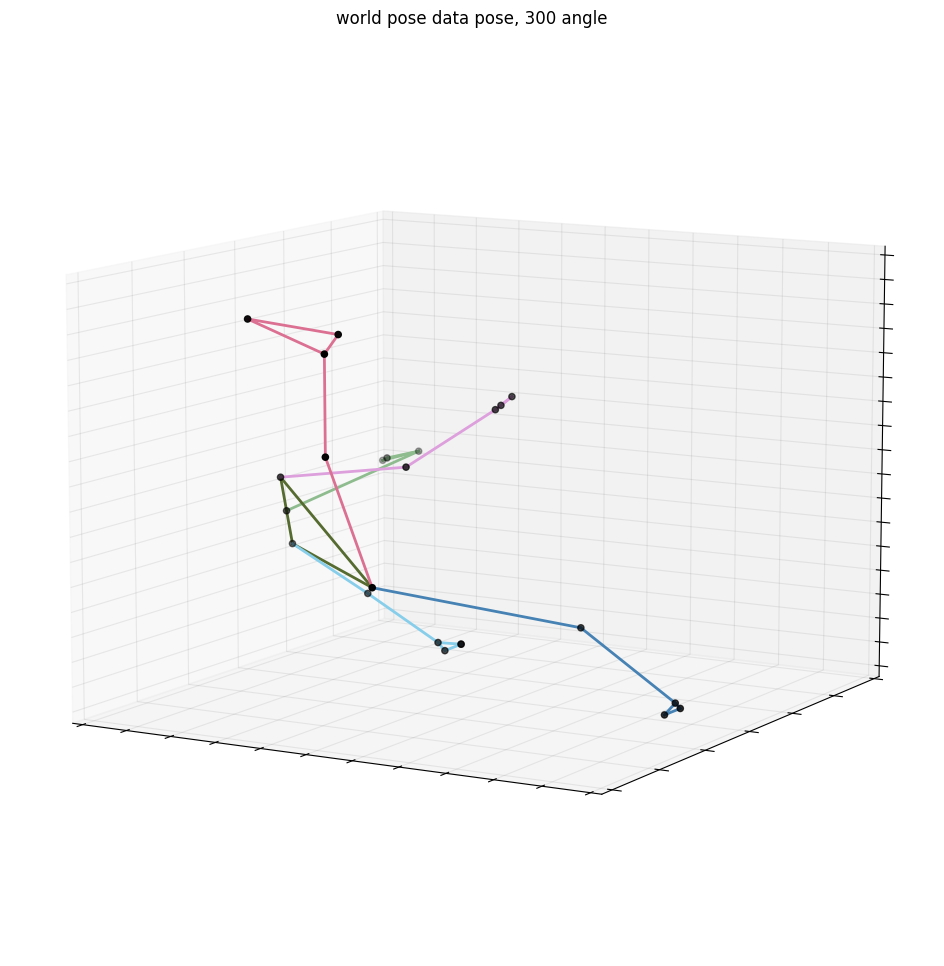

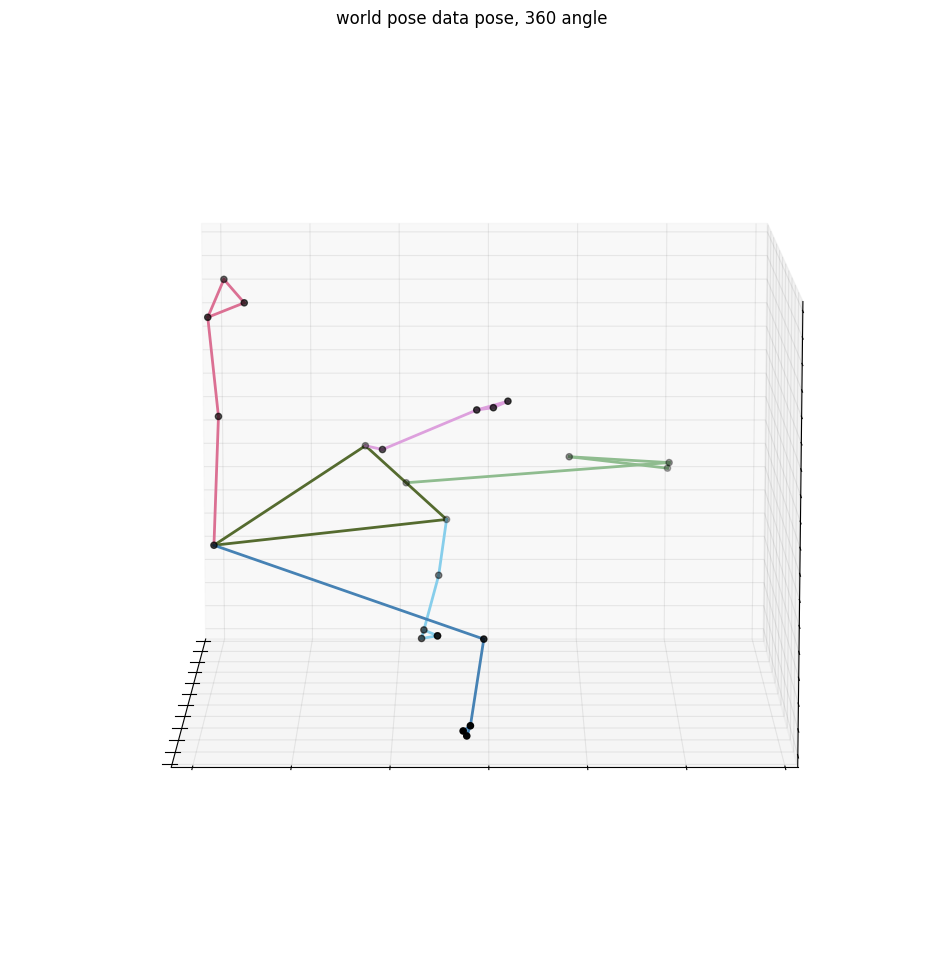

In [222]:
azimuth_angles = range(0, 361, 60)
for i in azimuth_angles:
    pose_coordinates = get_3d_coordinates_for_plot(pose_world_df,1)
    plot_world_pose_coordinates(pose_coordinates,i, f"world pose data pose, {i} angle")